In [3]:
import gzip, json, random, pandas as pd
from Scripts import preprocessing as prep
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

amazon_input = '../Data/reviews_Movies_and_TV_5.json.gz'
schema_input = '../Data/movie_reviews.csv'

In [5]:
df = pd.read_csv(schema_input)
df = df[['REVIEWBODY', 'REVIEWRATING_adj']]
df.head()
df.head()
df_1 = df[df['REVIEWRATING_adj']==1.0].values.tolist()
df_2 = df[df['REVIEWRATING_adj']==2.0].values.tolist()
df_3 = df[df['REVIEWRATING_adj']==3.0].values.tolist()
df_4 = df[df['REVIEWRATING_adj']==4.0].values.tolist()
df_5 = df[df['REVIEWRATING_adj']==5.0].values.tolist()
df1 = random.sample(df_1, 201)
df2 = random.sample(df_2, 201)
df3 = random.sample(df_3, 201)
df4 = random.sample(df_4, 201)
df5 = random.sample(df_5, 201)
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])
df12 = pd.DataFrame(df2[1:], columns=['reviewText', 'overall'])
df13 = pd.DataFrame(df3[1:], columns=['reviewText', 'overall'])
df14 = pd.DataFrame(df4[1:], columns=['reviewText', 'overall'])
df15 = pd.DataFrame(df5[1:], columns=['reviewText', 'overall'])
schema = pd.concat([df11, df12, df13, df14, df15])
schema.reset_index(drop=True)

data = []
with gzip.open(amazon_input) as f:
    for l in f:
        data.append(json.loads(l.strip()))
df = pd.DataFrame.from_dict(data)
ama_df = df[['reviewText', 'overall']]

df.head()
df_1 = ama_df[ama_df['overall']==1.0].values.tolist()
df_2 = ama_df[ama_df['overall']==2.0].values.tolist()
df_3 = ama_df[ama_df['overall']==3.0].values.tolist()
df_4 = ama_df[ama_df['overall']==4.0].values.tolist()
df_5 = ama_df[ama_df['overall']==5.0].values.tolist()
df1 = random.sample(df_1, 201)
df2 = random.sample(df_2, 201)
df3 = random.sample(df_3, 201)
df4 = random.sample(df_4, 201)
df5 = random.sample(df_5, 201)
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])
df12 = pd.DataFrame(df2[1:], columns=['reviewText', 'overall'])
df13 = pd.DataFrame(df3[1:], columns=['reviewText', 'overall'])
df14 = pd.DataFrame(df4[1:], columns=['reviewText', 'overall'])
df15 = pd.DataFrame(df5[1:], columns=['reviewText', 'overall'])
amazon = pd.concat([df11, df12, df13, df14, df15])
amazon.reset_index(drop=True)

all = pd.concat([schema, amazon], ignore_index=True)
text = all['reviewText']
target = all['overall']

clean_text = pd.Series(prep.preprocess_reviews(text))


c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Feature size of TF-IDF:  23600
Training and prediction done
Training target statistics: Counter({4.0: 368, 2.0: 364, 3.0: 359, 5.0: 356, 1.0: 353})
Testing target statistics: Counter({1.0: 47, 5.0: 44, 3.0: 41, 2.0: 36, 4.0: 32})
train: 0.9/ test: 0.1
Accuracy:0.35
Precision:0.3677345758115274
F1:0.3471854470183563
col_0    1.0  2.0  3.0  4.0  5.0
overall                         
1.0       21   12    5    6    3
2.0        4   16    9    5    2
3.0        3   15   13    7    3
4.0        5    3   11    7    6
5.0        3    3    9   16   13
Feature size of TF-IDF:  20563
Training and prediction done
Training target statistics: Counter({2.0: 328, 5.0: 323, 3.0: 321, 1.0: 314, 4.0: 314})
Testing target statistics: Counter({4.0: 86, 1.0: 86, 3.0: 79, 5.0: 77, 2.0: 72})
train: 0.8/ test: 0.2
Accuracy:0.375
Precision:0.3896814852683398
F1:0.379071844073673
col_0    1.0  2.0  3.0  4.0  5.0
overall                         
1.0       41   26    9    6    4
2.0       10   26   19   15    2
3.0

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative so

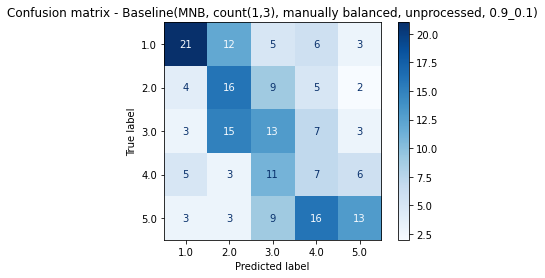

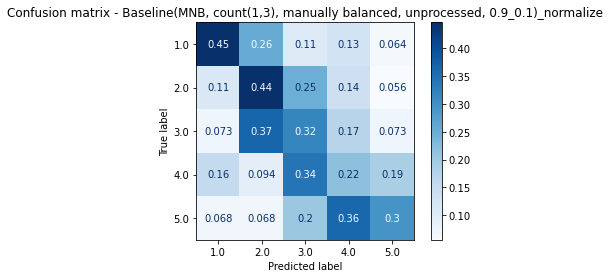

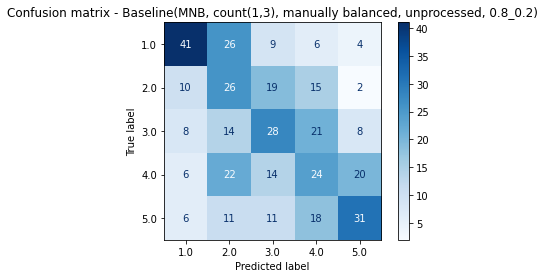

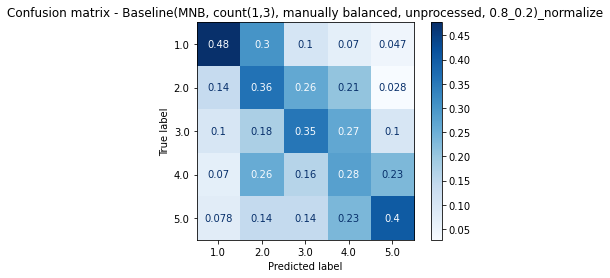

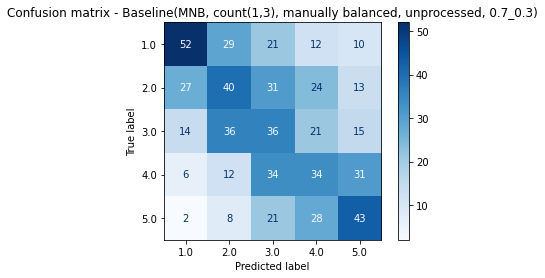

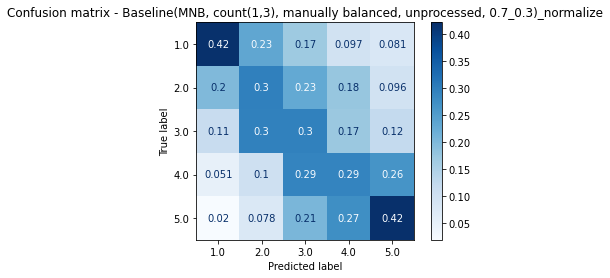

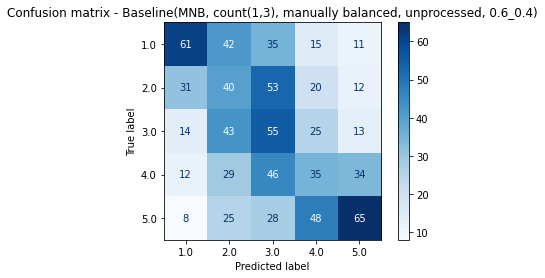

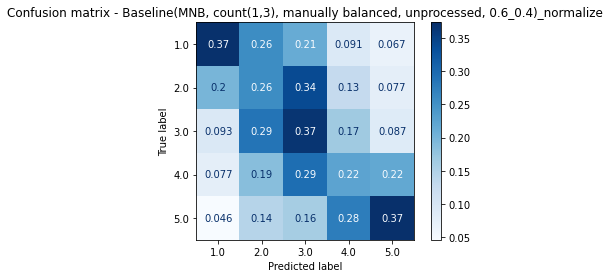

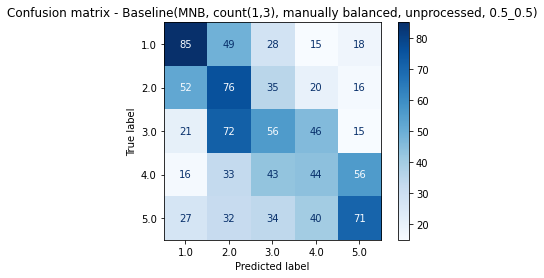

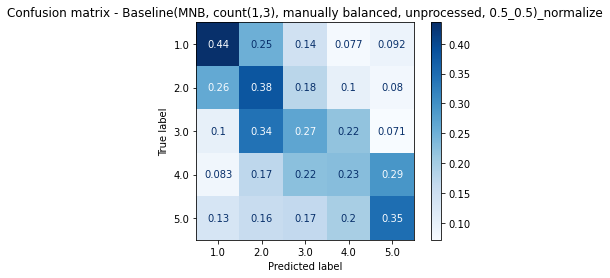

In [6]:
# cv = CountVectorizer(min_df=3, max_df=0.8, ngram_range=(1,5))

# clf = MultinomialNB()
# w = {1:2, 2:3, 3: 2, 4: 2, 5: 1 }
clf = LogisticRegression(dual=False, random_state=0, solver='lbfgs', multi_class='multinomial')
# clf = SVC(decision_function_shape="ovo")
# clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)


list_test = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in list_test:
    # Split dataset into training set and test set
    test_size = i
    train_size = 1 - i
    X_train, X_test, y_train, y_test = train_test_split(clean_text, target, test_size=i,random_state=None)

    # vectorizer = TfidfVectorizer(min_df=2 ,max_df=0.8, use_idf=True,sublinear_tf=True, ngram_range=(1,3))
    vectorizer = CountVectorizer(min_df=2 ,max_df=0.8, ngram_range=(1,3))

    train_vectorized = vectorizer.fit_transform(X_train)
    vocab = vectorizer.get_feature_names()

    print ("Feature size of TF-IDF: ", len(vocab))
    test_vectorized = vectorizer.transform(X_test)

    vectorizer_chi2 = SelectKBest(score_func=f_regression,k=3500)

    chi_train_vectorized = vectorizer_chi2.fit_transform(train_vectorized,y_train)
    chi_test_vectorized = vectorizer_chi2.transform(test_vectorized)

    # Train the model using the training sets
    # nb.fit(X_train, y_train)
    clf.fit(chi_train_vectorized, y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(chi_test_vectorized)

    print("Training and prediction done")
    print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
    print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

    # Model Accuracy, how often is the classifier correct?
    print("train: " + str(train_size) + "/ test: " + str(test_size))
    accuracy = str(metrics.accuracy_score(y_test, y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("F1:" + f1)
    print(pd.crosstab(y_test, y_pred))

    # Visualization of Confusion Matrix and saving
    plt.rcParams['figure.facecolor'] = 'white'
    title = f"Confusion matrix - Baseline(MNB, count(1,3), manually balanced, unprocessed, {train_size}_{test_size})"
    disp = plot_confusion_matrix(clf, chi_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(clf, chi_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.show()